In [1]:
import keras
from keras.models import Sequential
from keras import layers
import numpy as np
from google.colab import drive

In [2]:
np.random.seed(1000)

In [3]:
AlexNet = Sequential()

First Layer


In [4]:
AlexNet.add(layers.Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(2,2),strides=(4,4),padding='same'))

In [5]:
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.LeakyReLU())
AlexNet.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
AlexNet.add(layers.Dropout(0.2))

Second Layer

In [6]:
AlexNet.add(layers.Conv2D(filters=32, kernel_size=(2, 2), strides=(1,1), padding='same'))
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.LeakyReLU())
AlexNet.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
AlexNet.add(layers.Dropout(0.2))

Third Layer

In [7]:
AlexNet.add(layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1), padding='same'))
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.LeakyReLU())

Fourth Layer

In [8]:
AlexNet.add(layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1), padding='same'))
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.LeakyReLU())

Fifth layer

In [9]:
AlexNet.add(layers.Conv2D(filters=64, kernel_size=(1,1), strides=(1,1), padding='same'))
AlexNet.add(layers.BatchNormalization())
AlexNet.add(layers.LeakyReLU())

In [10]:
AlexNet.add(layers.Conv2D(filters=2,kernel_size=(1,1)))

In [11]:
AlexNet.add(layers.GlobalAveragePooling2D())

In [12]:
AlexNet.add(layers.Dense(units = 4, activation='softmax'))

In [13]:
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 32)          416       
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 32)         128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8, 8, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4

Preparing the dataset

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
TRAIN_DATA = '/content/gdrive/MyDrive/Minor_Project/dataset_ct/Data/train'

In [18]:
train_data = train_datagen.flow_from_directory(TRAIN_DATA,target_size=(32,32),class_mode="categorical",batch_size=20,shuffle=True)

Found 613 images belonging to 4 classes.


In [19]:
Val_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
VAL_DATA = '/content/gdrive/MyDrive/Minor_Project/dataset_ct/Data/valid'

In [21]:
validation_Data = Val_datagen.flow_from_directory(VAL_DATA,target_size=(32,32),class_mode="categorical",batch_size=20,shuffle=True)

Found 72 images belonging to 4 classes.


In [22]:
AlexNet.compile(optimizer=keras.optimizers.Adam(0.001),loss="categorical_crossentropy",metrics=['accuracy',keras.metrics.AUC(),keras.metrics.Precision()])

In [23]:
h1 = AlexNet.fit(train_data,batch_size=20,validation_data=validation_Data,epochs = 20,validation_batch_size=20,verbose=1)

Epoch 1/20
31/31 [==============================] - 7s 183ms/step - loss: 1.3051 - accuracy: 0.3866 - auc: 0.6410 - precision: 0.2683 - val_loss: 1.3879 - val_accuracy: 0.3194 - val_auc: 0.5344 - val_precision: 0.0000e+00
Epoch 2/20
31/31 [==============================] - 5s 158ms/step - loss: 1.2254 - accuracy: 0.5090 - auc: 0.7125 - precision: 0.6056 - val_loss: 1.3823 - val_accuracy: 0.3194 - val_auc: 0.5545 - val_precision: 0.0000e+00
Epoch 3/20
31/31 [==============================] - 5s 156ms/step - loss: 1.1284 - accuracy: 0.5498 - auc: 0.7674 - precision: 0.7278 - val_loss: 1.3949 - val_accuracy: 0.3194 - val_auc: 0.5485 - val_precision: 0.0000e+00
Epoch 4/20
31/31 [==============================] - 6s 193ms/step - loss: 1.0951 - accuracy: 0.5449 - auc: 0.7802 - precision: 0.7098 - val_loss: 1.4381 - val_accuracy: 0.3194 - val_auc: 0.5501 - val_precision: 0.0000e+00
Epoch 5/20
31/31 [==============================] - 5s 178ms/step - loss: 1.0038 - accuracy: 0.5954 - auc: 0.825

In [24]:
from keras.callbacks import History

In [25]:
print(h1.history.keys())

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision'])


In [26]:
import matplotlib.pyplot as plt

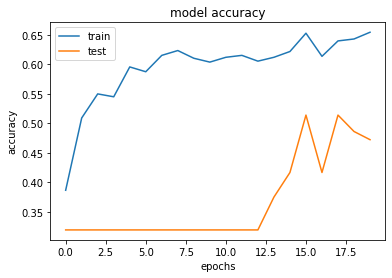

In [28]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

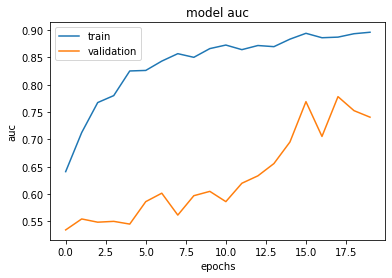

In [30]:
plt.plot(h1.history['auc'])
plt.plot(h1.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper left')
plt.show()

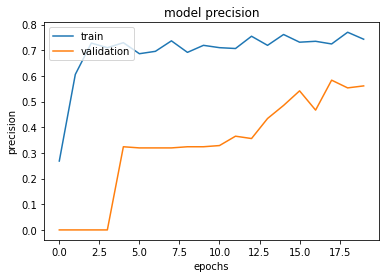

In [31]:
plt.plot(h1.history['precision'])
plt.plot(h1.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper left')
plt.show()